# MONTE CARLO INTUITION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import timedelta
import random
import statistics

import mplfinance as mpf
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../Data/FixTimeBars/EURUSD_4H_Admiral_READY.csv", index_col="time", parse_dates=True)
df

,open,high,low,close,tick_volume,spread,real_volume,low_time,high_time
time,,,,,,,,,
2015-01-29 08:00:00,1.12738,1.13189,1.12648,1.13153,38483,4,44203500000,2015-01-29 10:00:00,2015-01-29 11:30:00
2015-01-29 12:00:00,1.13151,1.13272,1.12899,1.13230,41434,4,44002000000,2015-01-29 12:30:00,2015-01-29 13:30:00
2015-01-29 16:00:00,1.13236,1.13676,1.12784,1.13040,54003,4,59686500000,2015-01-29 19:30:00,2015-01-29 17:30:00
2015-01-29 20:00:00,1.13039,1.13267,1.12943,1.13180,16278,4,20679000000,2015-01-29 20:00:00,2015-01-29 22:30:00
2015-01-30 00:00:00,1.13178,1.13374,1.13166,1.13330,11607,4,13241500000,2015-01-30 00:00:00,2015-01-30 02:00:00
...,...,...,...,...,...,...,...,...,...
2023-02-13 16:00:00,1.06807,1.07274,1.06765,1.07183,19110,0,0,2023-02-13 16:00:00,2023-02-13 17:30:00
2023-02-13 20:00:00,1.07182,1.07299,1.07117,1.07251,7838,0,0,2023-02-13 20:00:00,2023-02-13 20:30:00
2023-02-14 00:00:00,1.07202,1.07369,1.07193,1.07287,6234,0,0,2023-02-14 00:00:00,2023-02-14 02:00:00


In [3]:
# CREATE SOME NEW VARIABLES 

# Compute the variation from open to low,high,close
df["pct_open_low"] = (df["low"] - df["open"]) / df["open"]
df["pct_open_high"] = (df["high"] - df["open"]) / df["open"]
df["pct_open_close"] = (df["close"] - df["open"]) / df["open"]

# Compute the candles lenght in second (essential for non fix time bars)
time_index = list((df.index[1:] - df.index[:-1]).total_seconds())
time_index.insert(0, time_index[0])
df["time_variation"] = time_index

df.head(15)

,open,high,low,close,tick_volume,spread,real_volume,low_time,high_time,pct_open_low,pct_open_high,pct_open_close,time_variation
time,,,,,,,,,,,,,
2015-01-29 08:00:00,1.12738,1.13189,1.12648,1.13153,38483,4,44203500000,2015-01-29 10:00:00,2015-01-29 11:30:00,-0.000798,0.004000,0.003681,14400.0
2015-01-29 12:00:00,1.13151,1.13272,1.12899,1.13230,41434,4,44002000000,2015-01-29 12:30:00,2015-01-29 13:30:00,-0.002227,0.001069,0.000698,14400.0
2015-01-29 16:00:00,1.13236,1.13676,1.12784,1.13040,54003,4,59686500000,2015-01-29 19:30:00,2015-01-29 17:30:00,-0.003992,0.003886,-0.001731,14400.0
2015-01-29 20:00:00,1.13039,1.13267,1.12943,1.13180,16278,4,20679000000,2015-01-29 20:00:00,2015-01-29 22:30:00,-0.000849,0.002017,0.001247,14400.0
2015-01-30 00:00:00,1.13178,1.13374,1.13166,1.13330,11607,4,13241500000,2015-01-30 00:00:00,2015-01-30 02:00:00,-0.000106,0.001732,0.001343,14400.0
2015-01-30 04:00:00,1.13327,1.13392,1.13212,1.13388,11298,4,13445000000,2015-01-30 05:30:00,2015-01-30 07:30:00,-0.001015,0.000574,0.000538,14400.0
2015-01-30 08:00:00,1.13389,1.13526,1.13039,1.13093,33631,4,40258500000,2015-01-30 11:30:00,2015-01-30 10:30:00,-0.003087,0.001208,-0.002610,14400.0
2015-01-30 12:00:00,1.13091,1.13633,1.12916,1.13176,52025,4,56504500000,2015-01-30 15:00:00,2015-01-30 13:00:00,-0.001547,0.004793,0.000752,14400.0
2015-01-30 16:00:00,1.13177,1.13258,1.12786,1.12870,49785,4,56212500000,2015-01-30 18:00:00,2015-01-30 16:00:00,-0.003455,0.000716,-0.002713,14400.0


# DO NOT DO THAT (PLEASE)

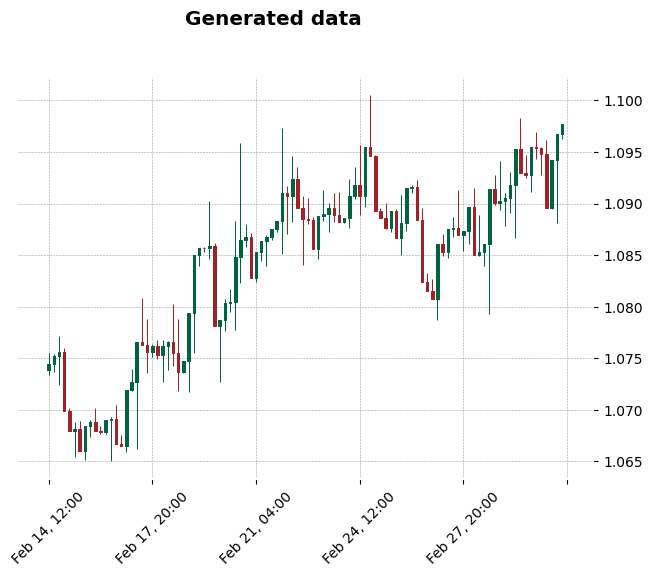

In [5]:
# Grab the last open price and data
start_price, start_date = df["open"].iloc[-1], df.index[-1]
open_price, current_date = start_price, start_date

# Create an empty list for our simulated data
data_new = []
for _ in range(1000):
    
    # Take our sample and extract one 
    pct_open_low, pct_open_high, pct_open_close = np.random.choice(df["pct_open_low"]), np.random.choice(df["pct_open_high"]), np.random.choice(df["pct_open_close"])
    time_variation = 4*60*60

    # Compute prices
    low_price = open_price * (1+pct_open_low)
    high_price = open_price * (1+pct_open_high)
    close_price = open_price * (1+pct_open_close)

    current_date+= timedelta(seconds=time_variation)
    
    # Verify low ≤ close & close ≤ high (We are never too careful)
    if close_price < low_price:
        low_price = close_price
        
    if high_price < close_price:
        high_price = close_price
            
    # Add our new variables into the list
    data_new.append([open_price, high_price, low_price, close_price, current_date])
    
    # Update the next open price being the close price
    # You can add a gap based on the gap distribution of our asset if you want here
    open_price = close_price
    
df_simulated = pd.DataFrame(data_new, columns=["open", "low", "high", "close", "time"])
df_simulated = df_simulated.set_index("time")

mpf.plot(df_simulated.iloc[:100,:], type='candle', style='charles',
         title='Generated data',
         ylabel='',
         volume=False)

# DO THAT INSTEAD

Do not take randomly the "from open to low" variation, "from open to high" variation and so on. Indeed,if you do that, you will obtain unrealistic bars because you may have different volatility level (one for the low variation, one for the high variaiton,...) for the same day which is impossible in real life. Instead take all the values of the same row. (Like in the code below from line 10 to 13)

In [6]:
# ORGANIZE THE NEW VARIABLES IN A CORRECT WAY

# Create a list that we will use to generate new data from our sample
data = []
for i in range(len(df)):
    row_values = [df["pct_open_low"].iloc[i], df["pct_open_high"].iloc[i], df["pct_open_close"].iloc[i],
                 df["time_variation"].iloc[i]]

    data.append(row_values)


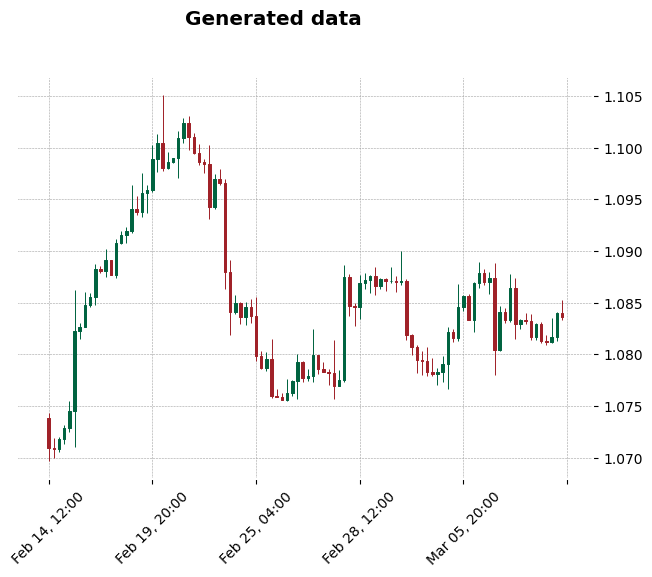

In [8]:
# Grab the last open price and data
start_price, start_date = df["open"].iloc[-1], df.index[-1]
open_price, current_date = start_price, start_date

# Create an empty list for our simulated data
data_new = []
for _ in range(1000):
    
    # Take our sample and extract one 
    row_values = random.choice(data)
    pct_open_low, pct_open_high, pct_open_close = row_values[0], row_values[1], row_values[2]
    time_variation = row_values[3]

    # Compute prices
    low_price = open_price * (1+pct_open_low)
    high_price = open_price * (1+pct_open_high)
    close_price = open_price * (1+pct_open_close)

    current_date+= timedelta(seconds=time_variation)
    
    # Verify low ≤ close & close ≤ high (We are never too careful)
    if close_price < low_price:
        low_price = close_price
        
    if high_price < close_price:
        high_price = close_price
            
    # Add our new variables into the list
    data_new.append([open_price, high_price, low_price, close_price, current_date])
    
    # Update the next open price being the close price
    # You can add a gap based on the gap distribution of our asset if you want here
    open_price = close_price
    
df_simulated = pd.DataFrame(data_new, columns=["open", "low", "high", "close", "time"])
df_simulated = df_simulated.set_index("time")

mpf.plot(df_simulated.iloc[:100,:], type='candle', style='charles',
         title='Generated data',
         ylabel='',
         volume=False)

# LAST MANDATORY PARAMETERS

In [9]:
df["var_low_time"] = (pd.to_datetime(df["low_time"]) - df.index).map(lambda x: x.total_seconds())
df["var_high_time"] = (pd.to_datetime(df["high_time"]) - df.index).map(lambda x: x.total_seconds())

In [10]:
df["var_high_time"] 

time
2015-01-29 08:00:00    12600.0
2015-01-29 12:00:00     5400.0
2015-01-29 16:00:00     5400.0
2015-01-29 20:00:00     9000.0
2015-01-30 00:00:00     7200.0
                        ...   
2023-02-13 16:00:00     5400.0
2023-02-13 20:00:00     1800.0
2023-02-14 00:00:00     7200.0
2023-02-14 04:00:00     7200.0
2023-02-14 08:00:00    12600.0
Name: var_high_time, Length: 12509, dtype: float64